In [1]:
from fastai.imports import *

In [2]:
!mkdir data

In [3]:
!wget http://files.fast.ai/data/dogscats.zip  

--2019-01-05 19:35:22--  http://files.fast.ai/data/dogscats.zip
Resolving files.fast.ai (files.fast.ai)... 67.205.15.147
Connecting to files.fast.ai (files.fast.ai)|67.205.15.147|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 857214334 (818M) [application/zip]
Saving to: ‘dogscats.zip’

dogscats.zip        100%[===================>] 817.50M   113MB/s    in 7.3s    

2019-01-05 19:35:29 (112 MB/s) - ‘dogscats.zip’ saved [857214334/857214334]



In [14]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [21]:
path ="/home/ubuntu/fastai/courses/dl1/data/dogscats/"
sz = 224

In [16]:
torch.cuda.is_available()

True

In [17]:
torch.backends.cudnn.enabled

True

In [18]:
os.listdir(path)

['train', 'test1', 'models', 'sample', 'valid']

In [22]:
os.listdir(f'{path}valid')

['cats', 'dogs']

In [23]:
files = os.listdir(f'{path}valid/cats')[:5]

In [24]:
files

['cat.716.jpg',
 'cat.12115.jpg',
 'cat.2580.jpg',
 'cat.5132.jpg',
 'cat.9955.jpg']

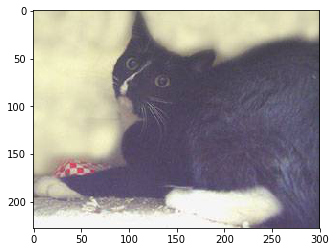

In [30]:
img = plt.imread(f'{path}valid/cats/{files[0]}')
plt.imshow(img)

In [31]:
#prtrained model
arch = resnet34
data = ImageClassifierData.from_paths(path,tfms = tfms_from_model(arch,sz))
learn = ConvLearner.pretrained(arch ,data,pretrained=True)
learn.fit(0.01,2)

epoch      trn_loss   val_loss   accuracy                     
    0      0.046071   0.031794   0.99      
    1      0.045612   0.028477   0.9895                       



[array([0.02848]), 0.9895]

In [36]:
data.classes

['cats', 'dogs']

In [37]:
log_predicts = learn.predict()
log_predicts.shape

(2000, 2)

In [38]:
log_predicts[:10]

array([[ -0.     , -12.56182],
       [ -0.0001 ,  -9.20753],
       [ -0.00012,  -9.05722],
       [ -0.00001, -12.09323],
       [ -0.00003, -10.37819],
       [ -0.00001, -11.69362],
       [ -0.00014,  -8.85378],
       [ -0.00012,  -9.00659],
       [ -0.00004, -10.01551],
       [ -0.001  ,  -6.90374]], dtype=float32)

In [39]:
preds = np.argmax(log_predicts,axis = 1)
probs = np.exp(log_predicts[:,1])

In [40]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], min(len(preds), 4), replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

In [41]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [44]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(path+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8)) if len(imgs)>0 else print('Not Found.')

Correctly classified


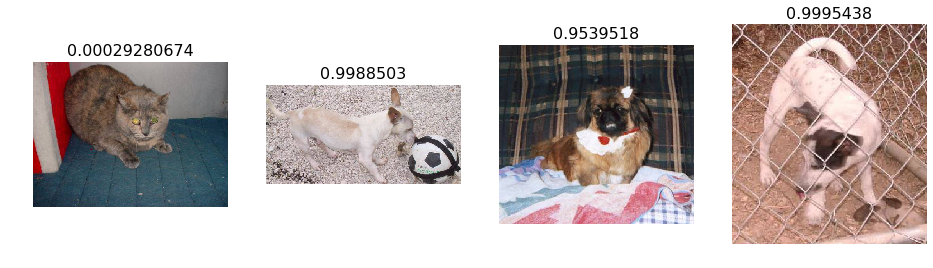

In [46]:
#plot correct classification
plot_val_with_title(rand_by_correct(True), "Correctly classified")